In [1]:
from sippy import *
import numpy as np
import pandas as pd
import plots

In [2]:
#load spteptest data from a TSV file
file = r'..\data\upstream_june_extracted.txt'
step_test_data = pd.read_table(file,header=[0, 1,2],index_col=[0], parse_dates=[0])
step_test_data.tail()

Time,KOPC_OP,KOPC_SP,PIC100_OP,PIC100X_SP,TIC100_OP,TIC100_SP,GAS.PV,HPCPOWER.PV,WELL1.OP,WELL2.OP,WELL3.OP
,KOPC Output,KOPC Set Point,PIC100 Output,PIC100X Set Point,TIC100 Output,TIC100 Set Point,b,HP Comp. Power,Well 1 Valve %,Well 2 Valve %,Well 3 Valve %
,%,kPa,%,kPa,%,C,x,kW,%,%,%
2016-07-21 06:48:00,77.1116,2681.59,43.4467,2800.0,17.8751,22.4984,140.128,2928.7,69.1042,78.4636,75.9323
2016-07-21 06:49:00,77.1116,2681.59,43.4467,2800.0,17.8751,22.4984,140.128,2928.7,69.1042,78.4636,75.9323
2016-07-21 06:50:00,77.1116,2681.59,43.4467,2800.0,17.8751,22.4984,140.128,2928.7,69.1042,78.4636,75.9323
2016-07-21 06:51:00,77.1116,2681.59,43.4467,2800.0,17.8751,22.4984,140.128,2928.7,69.1042,78.4636,75.9323
2016-07-21 06:52:00,77.1116,2681.59,43.4467,2800.0,17.8751,22.4984,140.128,2928.7,69.1042,78.4636,75.9323


In [3]:
#slice data for model identification case
start = '2016-07-01 04:00:00'
end = '2016-07-04 03:59:00'
step_test = step_test_data.loc[start:end]
Time = step_test.index

#Drop mutilevel index
step_test.columns = [col[0] for col in step_test.columns]
step_test.head()

,KOPC_OP,KOPC_SP,PIC100_OP,PIC100X_SP,TIC100_OP,TIC100_SP,GAS.PV,HPCPOWER.PV,WELL1.OP,WELL2.OP,WELL3.OP
2016-07-01 04:00:00,69.9488,2730.13,45.0977,2821.55,18.8697,21.7889,143.202,3019.89,79.5119,70.3849,78.9292
2016-07-01 04:01:00,69.9910,2730.13,45.0956,2821.55,18.8879,21.7889,143.460,3020.84,79.5119,70.3849,78.9292
2016-07-01 04:02:00,70.1902,2730.13,45.0961,2821.55,18.9026,21.7889,143.491,3019.61,79.5119,70.3849,78.9292
2016-07-01 04:03:00,69.9426,2730.13,45.0984,2821.55,18.9314,21.7889,143.357,3020.91,79.5119,70.3849,78.9292
2016-07-01 04:04:00,69.7443,2730.13,45.1050,2821.55,18.9332,21.7889,143.493,3019.42,79.5119,70.3849,78.9292


In [4]:
#select Inputs and Outputs for the model identification case
inputs = ['KOPC_SP', 'PIC100X_SP', 'TIC100_SP', 'WELL1.OP', 'WELL2.OP', 'WELL3.OP']
outputs = ['GAS.PV', 'HPCPOWER.PV', 'KOPC_OP', 'PIC100_OP', 'TIC100_OP']

In [5]:
#Convert dataframe to numpy arry.
u = step_test[inputs].to_numpy().T
y = step_test[outputs].to_numpy().T
print('Output shape:', y.shape)
print('Input shape:',u.shape)

Output shape: (5, 4320)
Input shape: (6, 4320)


In [6]:
#specify model identification parameters, reffer the documentation for detais.
method='CVA'
IC = 'AIC' # None, AIC, AICc, BIC
TH = 30 # The length of time horizon used for regression
fix_ordr = 4 # Used if and only if IC = 'None'
max_order = 25 # Used if IC = AIC, AICc or BIC
req_D = False
force_A_stable = False

In [7]:
# Fit model
sys_id = system_identification(
    y, 
    u, 
    method,
    SS_fixed_order=fix_ordr,
    SS_max_order=max_order,
    IC=IC,
    SS_f=TH,
    SS_p=TH,
    SS_D_required=req_D,
    SS_A_stability=force_A_stable
    )

#print model order
# print('Model order:', sys_id.n)

#save model parameters A, B, C,D and X0 as npz file
model = 'feac2.npz'
np.savez(model, A=sys_id.A, B=sys_id.B, C=sys_id.C, D=sys_id.D, K=sys_id.K, X0=sys_id.x0)

The suggested order is: n= 7


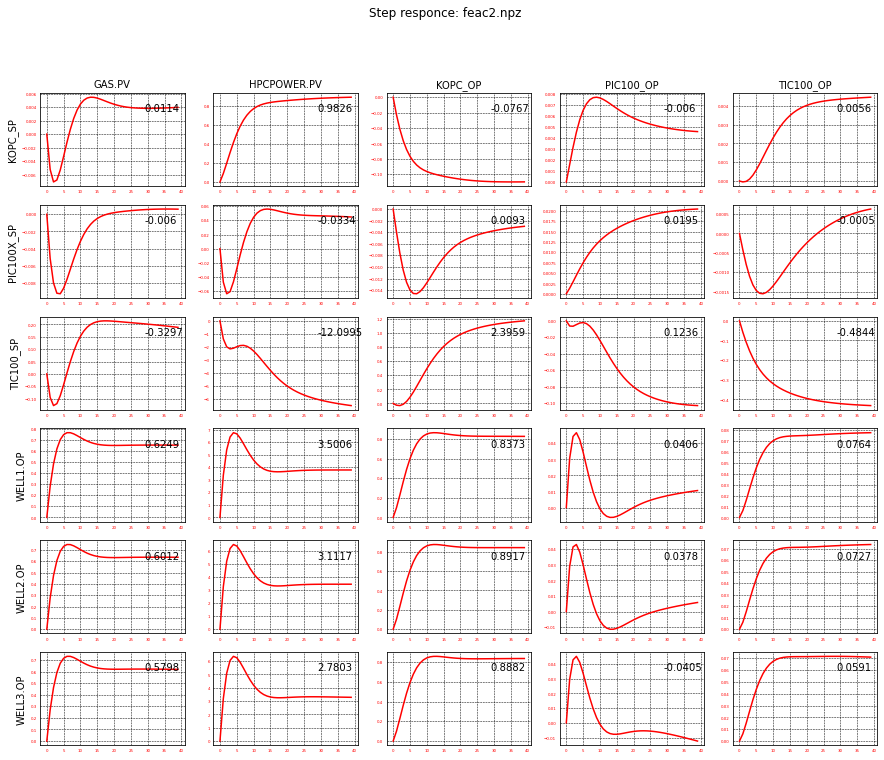

In [8]:
plots.plot_model(model, inputs, outputs, tss=40)

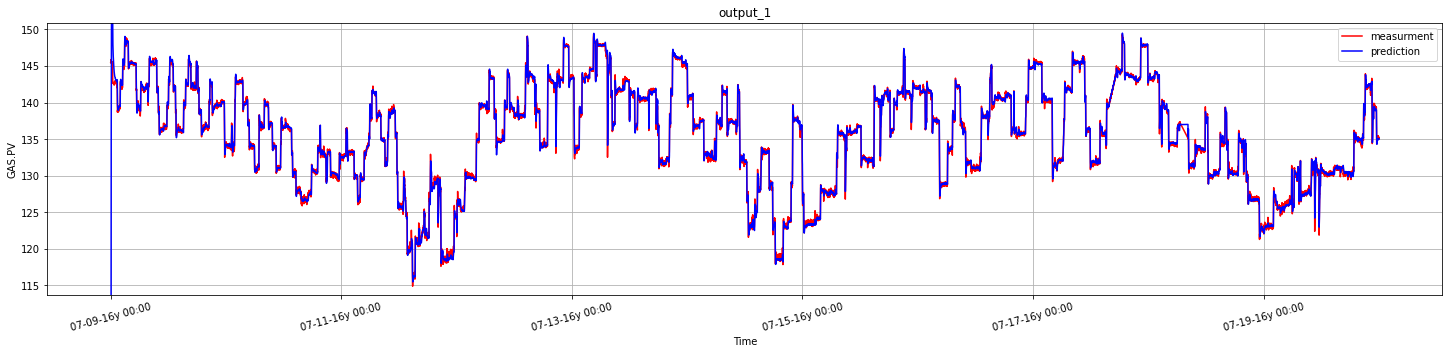

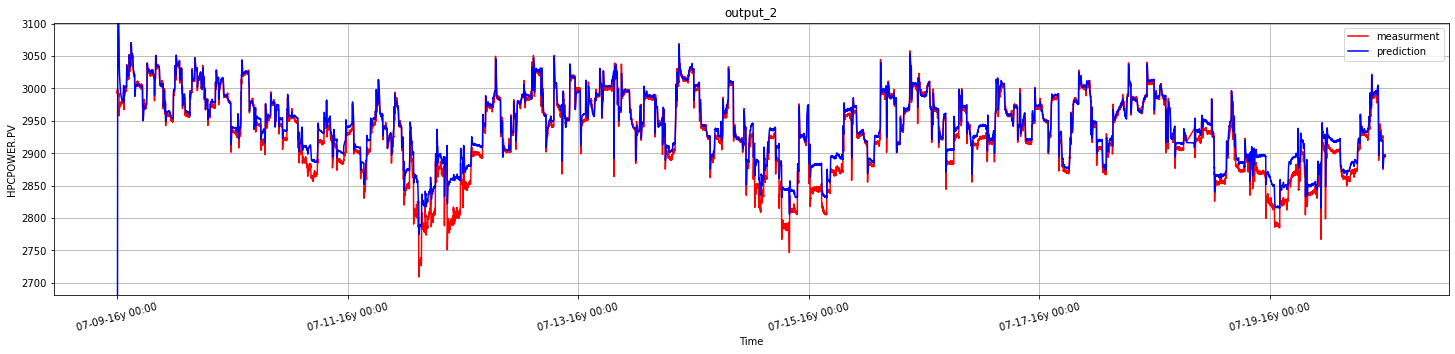

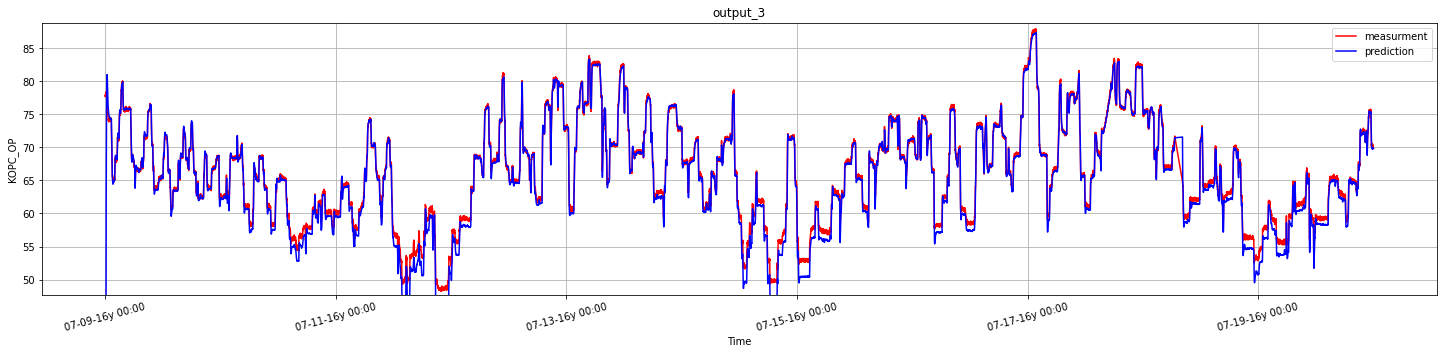

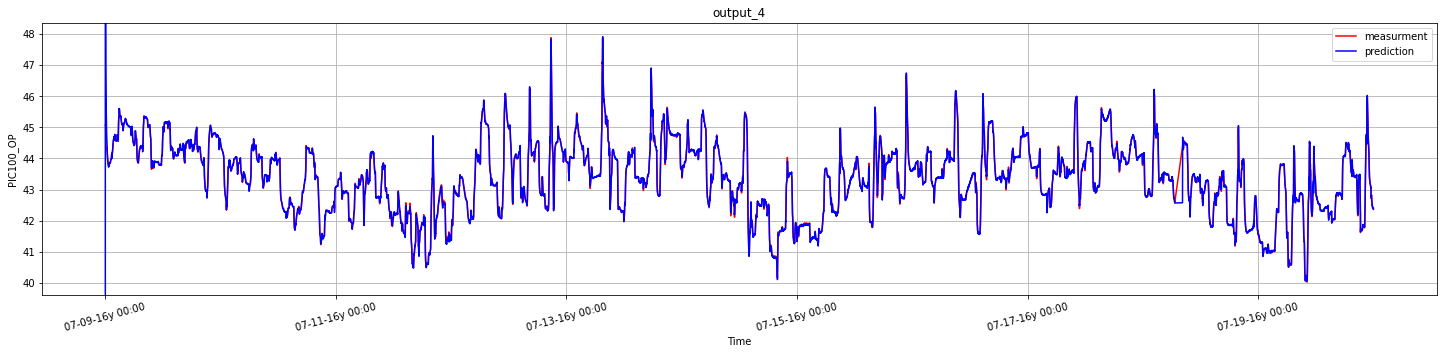

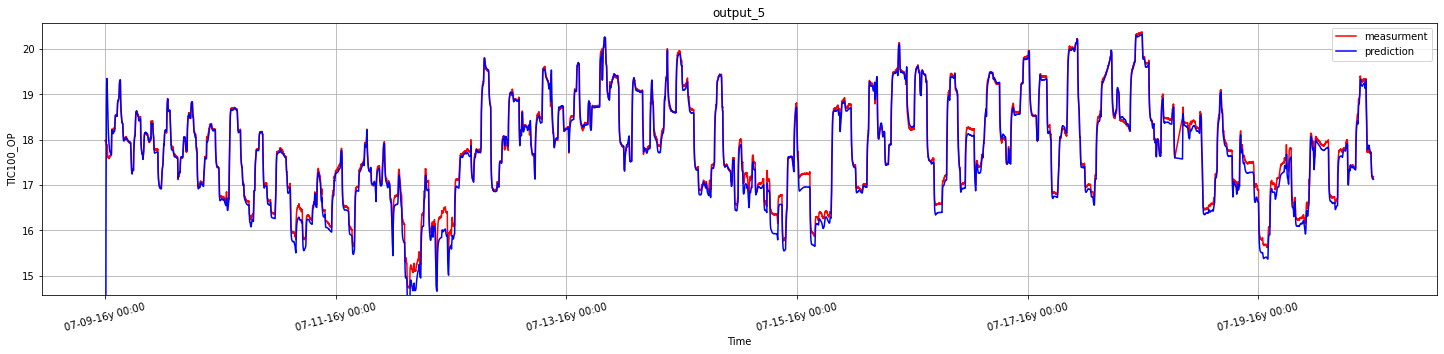

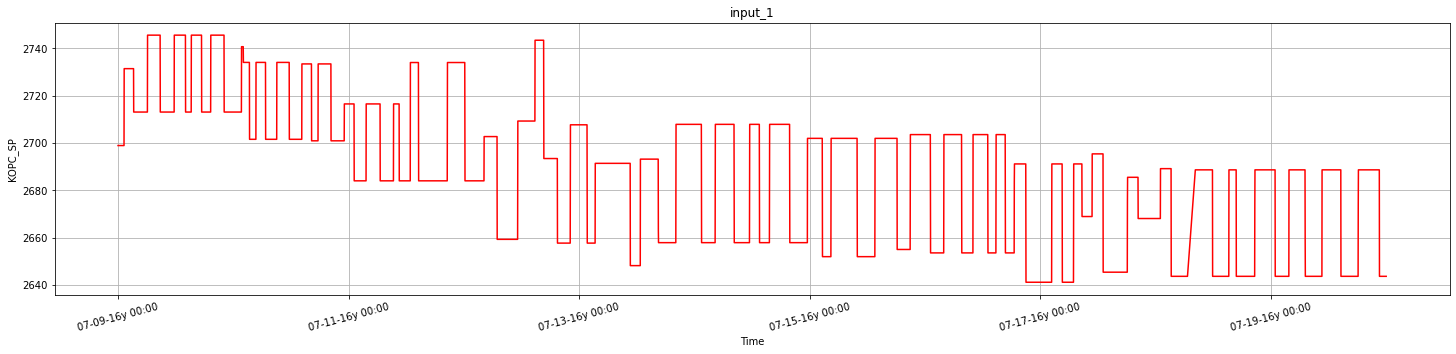

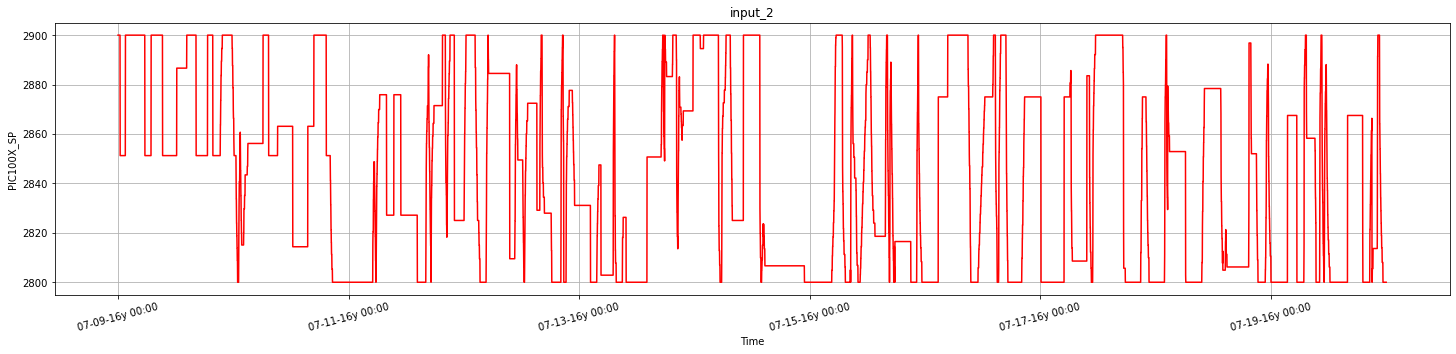

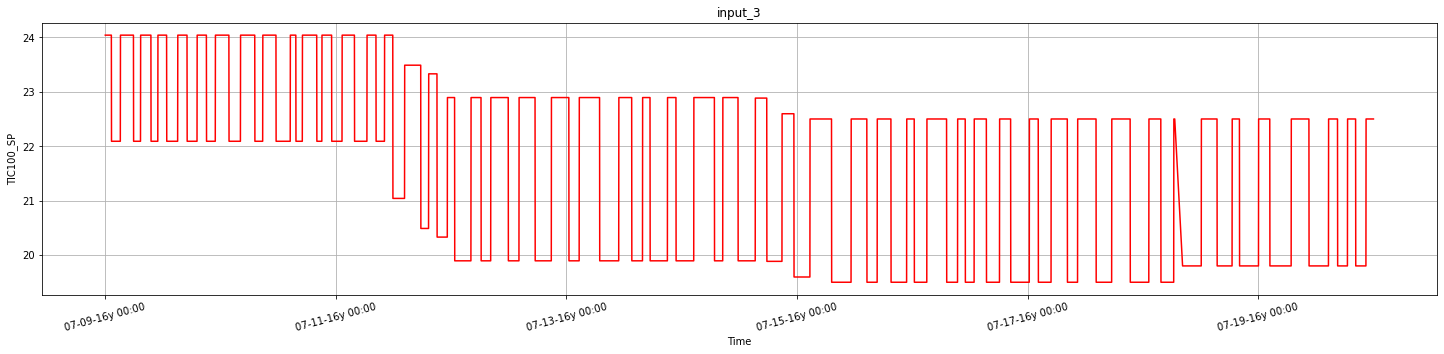

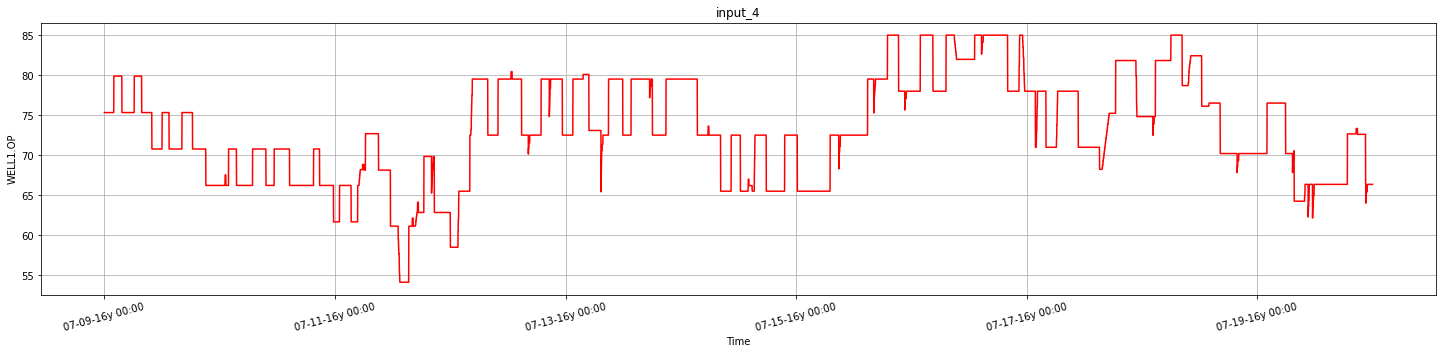

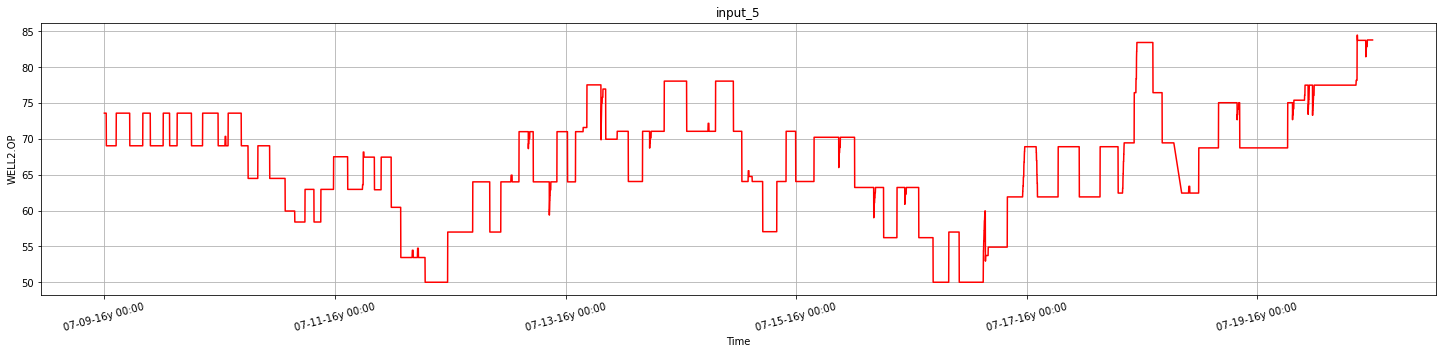

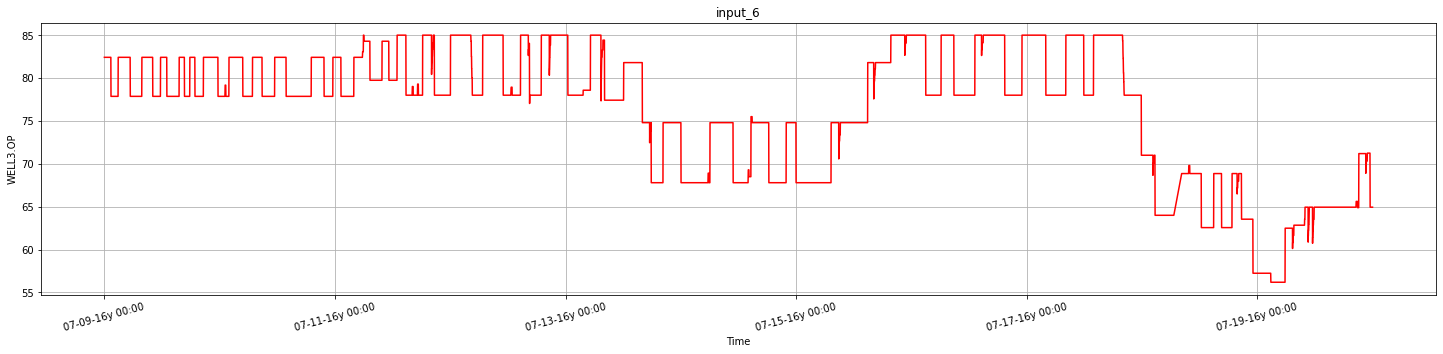

In [9]:
start_time = '2016-07-09 00:00:00'
end_time = '2016-07-20 00:00:00'
plots.plot_comparison(step_test_data, model, inputs, outputs, start_time, end_time, plt_input=True, scale_plt=True)